# Week 2

In [62]:
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [63]:
url1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
url2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
url3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
url4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'

### Part 1

In [64]:
data1 = pd.read_csv(url1, delimiter='\t', header=None, names=['x', 'y'])
data2 = pd.read_csv(url2, delimiter='\t', header=None, names=['x', 'y'])
data3 = pd.read_csv(url3, delimiter='\t', header=None, names=['x', 'y'])
data4 = pd.read_csv(url4, delimiter='\t', header=None, names=['x', 'y'])

In [65]:
data = [data1.sort_values(by=['x']), data2.sort_values(by=['x']), data3.sort_values(by=['x']), data4.sort_values(by=['x'])]
fittedlines = []
for i in range(0, 4):
    meanx = np.mean(data[i]['x'])
    meany = np.mean(data[i]['y'])
    print("{:d}. dataset means: x={:.2f}, y={:.2f}".format(i+1, meanx, meany))
    varx = np.var(data[i]['x'])
    vary = np.var(data[i]['y'])
    print("{:d}. dataset variances: x={:.3f}, y={:.3f}".format(i+1, varx, vary))
    pearson = np.corrcoef(data[i], rowvar=False)
    np.set_printoptions(precision=3)
    print("Pearson correlation coefficient:")
    print(pearson)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[i]['x'],data[i]['y'])
    print("f(x) = {:.2f}x + {:.2f}".format(slope, intercept))
    fittedlines.append((slope, intercept))
    print('\n')

1. dataset means: x=9.00, y=7.50
1. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


2. dataset means: x=9.00, y=7.50
2. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


3. dataset means: x=9.00, y=7.50
3. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


4. dataset means: x=9.00, y=7.50
4. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.817]
 [0.817 1.   ]]
f(x) = 0.50x + 3.00




From the calculated values, the datasets are extremely similar, with only a slight difference in variance. 

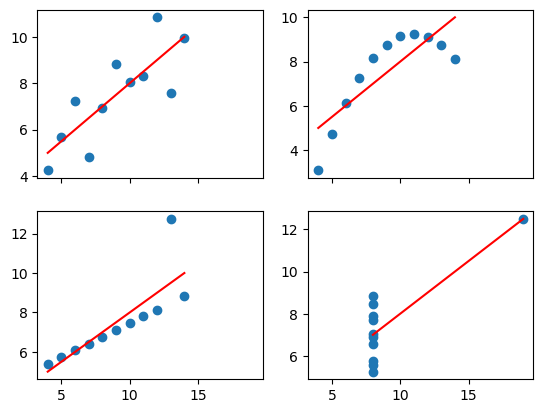

In [66]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True)
i = 0
for row in axes:
    for col in row:
        x = data[i]['x']
        col.scatter(x, data[i]['y'])
        y = fittedlines[i][0]*x + fittedlines[i][1]
        col.plot(x, y, color='red')
        i += 1
plt.show()

### Part 2

In [67]:
columns = ['Category', 'Date', 'Time', 'DayOfWeek']
data = pd.read_csv('crime.csv')
crimeData = pd.DataFrame(data, columns=columns)
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [68]:
crimeData['Date'] = pd.to_datetime(crimeData['Date'])
crimeData['Time'] = pd.to_datetime(crimeData['Time'])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
crimeData = crimeData[crimeData['Date'].dt.year != 2018]
crimeData

,Category,Date,Time,DayOfWeek
0,ROBBERY,2004-11-22,2023-02-19 17:50:00,Monday
1,VEHICLE THEFT,2005-10-18,2023-02-19 20:00:00,Tuesday
2,VEHICLE THEFT,2004-02-15,2023-02-19 02:00:00,Sunday
3,ARSON,2011-02-18,2023-02-19 05:27:00,Friday
4,ASSAULT,2010-11-21,2023-02-19 17:00:00,Sunday
...,...,...,...,...
2129520,DRUG/NARCOTIC,2017-06-22,2023-02-19 01:42:00,Thursday
2129521,ASSAULT,2017-09-01,2023-02-19 17:00:00,Friday
2129522,OTHER OFFENSES,2017-06-30,2023-02-19 17:50:00,Friday
2129523,OTHER OFFENSES,2017-12-20,2023-02-19 15:41:00,Wednesday


In [69]:
""" categorizedDaily = {}
days = pd.unique(crimeData['DayOfWeek'])
for category in focuscrimes:
    dict = {}
    for day in days:
        # filtering data to count the crimes in the specific category per day
        temp = crimeData.loc[data['DayOfWeek'] == day]
        count = temp.loc[data['Category'] == category].shape[0]
        dict[day] = count
    # creating dataframe and adding it to dictionary labeled with the crime category
    df = pd.DataFrame(dict.items(), columns=['Day of the Week', 'Crime count'])
    categorizedDaily[category] = df
categorizedDaily """

" categorizedDaily = {}\ndays = pd.unique(crimeData['DayOfWeek'])\nfor category in focuscrimes:\n    dict = {}\n    for day in days:\n        # filtering data to count the crimes in the specific category per day\n        temp = crimeData.loc[data['DayOfWeek'] == day]\n        count = temp.loc[data['Category'] == category].shape[0]\n        dict[day] = count\n    # creating dataframe and adding it to dictionary labeled with the crime category\n    df = pd.DataFrame(dict.items(), columns=['Day of the Week', 'Crime count'])\n    categorizedDaily[category] = df\ncategorizedDaily "

In [70]:
categorizedDaily = {}
for category in focuscrimes:
    df = crimeData[["Category", "DayOfWeek"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby(['DayOfWeek']).count().reindex(weekdays)
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedDaily[category] = df
categorizedDaily

{'ROBBERY':            Count
 DayOfWeek       
 Monday      7608
 Tuesday     7407
 Wednesday   7448
 Thursday    7405
 Friday      7655
 Saturday    8074
 Sunday      7820,
 'BURGLARY':            Count
 DayOfWeek       
 Monday     12706
 Tuesday    12797
 Wednesday  13068
 Thursday   13155
 Friday     15172
 Saturday   11610
 Sunday     10463,
 'TRESPASS':            Count
 DayOfWeek       
 Monday      2731
 Tuesday     2906
 Wednesday   2966
 Thursday    2682
 Friday      2672
 Saturday    2396
 Sunday      2328,
 'DRUG/NARCOTIC':            Count
 DayOfWeek       
 Monday     16448
 Tuesday    18574
 Wednesday  20104
 Thursday   18052
 Friday     16009
 Saturday   13950
 Sunday     13215,
 'DRIVING UNDER THE INFLUENCE':            Count
 DayOfWeek       
 Monday       629
 Tuesday      580
 Wednesday    572
 Thursday     682
 Friday       856
 Saturday    1139
 Sunday      1102,
 'VEHICLE THEFT':            Count
 DayOfWeek       
 Monday     17062
 Tuesday    16921
 Wednesday  1

In [71]:
categorizedMonthly = {}
for category in focuscrimes:
    df = crimeData[["Category", "Date"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby(df['Date'].dt.month_name()).count().reindex(months)
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedMonthly[category] = df
categorizedMonthly

{'ROBBERY':            Count  Date
 Date                  
 January     4508  4508
 February    3880  3880
 March       4188  4188
 April       4430  4430
 May         4521  4521
 June        4568  4568
 July        4570  4570
 August      4834  4834
 September   4410  4410
 October     4817  4817
 November    4354  4354
 December    4337  4337,
 'BURGLARY':            Count  Date
 Date                  
 January     7561  7561
 February    6685  6685
 March       7697  7697
 April       7462  7462
 May         7602  7602
 June        7060  7060
 July        7604  7604
 August      7513  7513
 September   7174  7174
 October     7423  7423
 November    7441  7441
 December    7749  7749,
 'TRESPASS':            Count  Date
 Date                  
 January     1671  1671
 February    1359  1359
 March       1633  1633
 April       1574  1574
 May         1686  1686
 June        1513  1513
 July        1566  1566
 August      1587  1587
 September   1592  1592
 October     1572  1572
 No

In [72]:
categorizedHourly = {}
for category in focuscrimes:
    df = crimeData[["Category", "Time"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby(df['Time'].dt.hour).count()
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedHourly[category] = df
categorizedHourly

{'ROBBERY':       Count  Time
 Time             
 0      2908  2908
 1      2987  2987
 2      3129  3129
 3      1888  1888
 4      1225  1225
 5      1056  1056
 6      1011  1011
 7       905   905
 8      1013  1013
 9      1219  1219
 10     1388  1388
 11     1556  1556
 12     1849  1849
 13     1973  1973
 14     2086  2086
 15     2328  2328
 16     2566  2566
 17     2559  2559
 18     2704  2704
 19     2914  2914
 20     3272  3272
 21     3733  3733
 22     3695  3695
 23     3453  3453,
 'BURGLARY':       Count  Time
 Time             
 0      3386  3386
 1      2186  2186
 2      2358  2358
 3      2412  2412
 4      2143  2143
 5      1954  1954
 6      1968  1968
 7      3097  3097
 8      4795  4795
 9      4190  4190
 10     3893  3893
 11     3675  3675
 12     4938  4938
 13     3258  3258
 14     3542  3542
 15     4151  4151
 16     4622  4622
 17     6201  6201
 18     6240  6240
 19     4669  4669
 20     4083  4083
 21     3957  3957
 22     3740  3740
 23    

In [73]:
categorizedHourlyWithDay = {}
for category in focuscrimes:
    df = crimeData[["Category", "Date", "Time"]]
    df = df.loc[df['Category'] == category]
    df = df.groupby([df['Date'].dt.day_name(), df['Time'].dt.hour]).count()
    df.rename(columns={'Category': 'Count'}, inplace=True)
    categorizedHourlyWithDay[category] = df
categorizedHourlyWithDay

{'ROBBERY':                 Count  Date  Time
 Date      Time                   
 Friday    0       387   387   387
           1       377   377   377
           2       395   395   395
           3       198   198   198
           4       147   147   147
 ...               ...   ...   ...
 Wednesday 19      414   414   414
           20      501   501   501
           21      529   529   529
           22      536   536   536
           23      462   462   462
 
 [168 rows x 3 columns],
 'BURGLARY':                 Count  Date  Time
 Date      Time                   
 Friday    0       495   495   495
           1       318   318   318
           2       333   333   333
           3       313   313   313
           4       306   306   306
 ...               ...   ...   ...
 Wednesday 19      661   661   661
           20      607   607   607
           21      566   566   566
           22      531   531   531
           23      486   486   486
 
 [168 rows x 3 columns],
 'TRESPASS': 

##### Weekly trends in crime

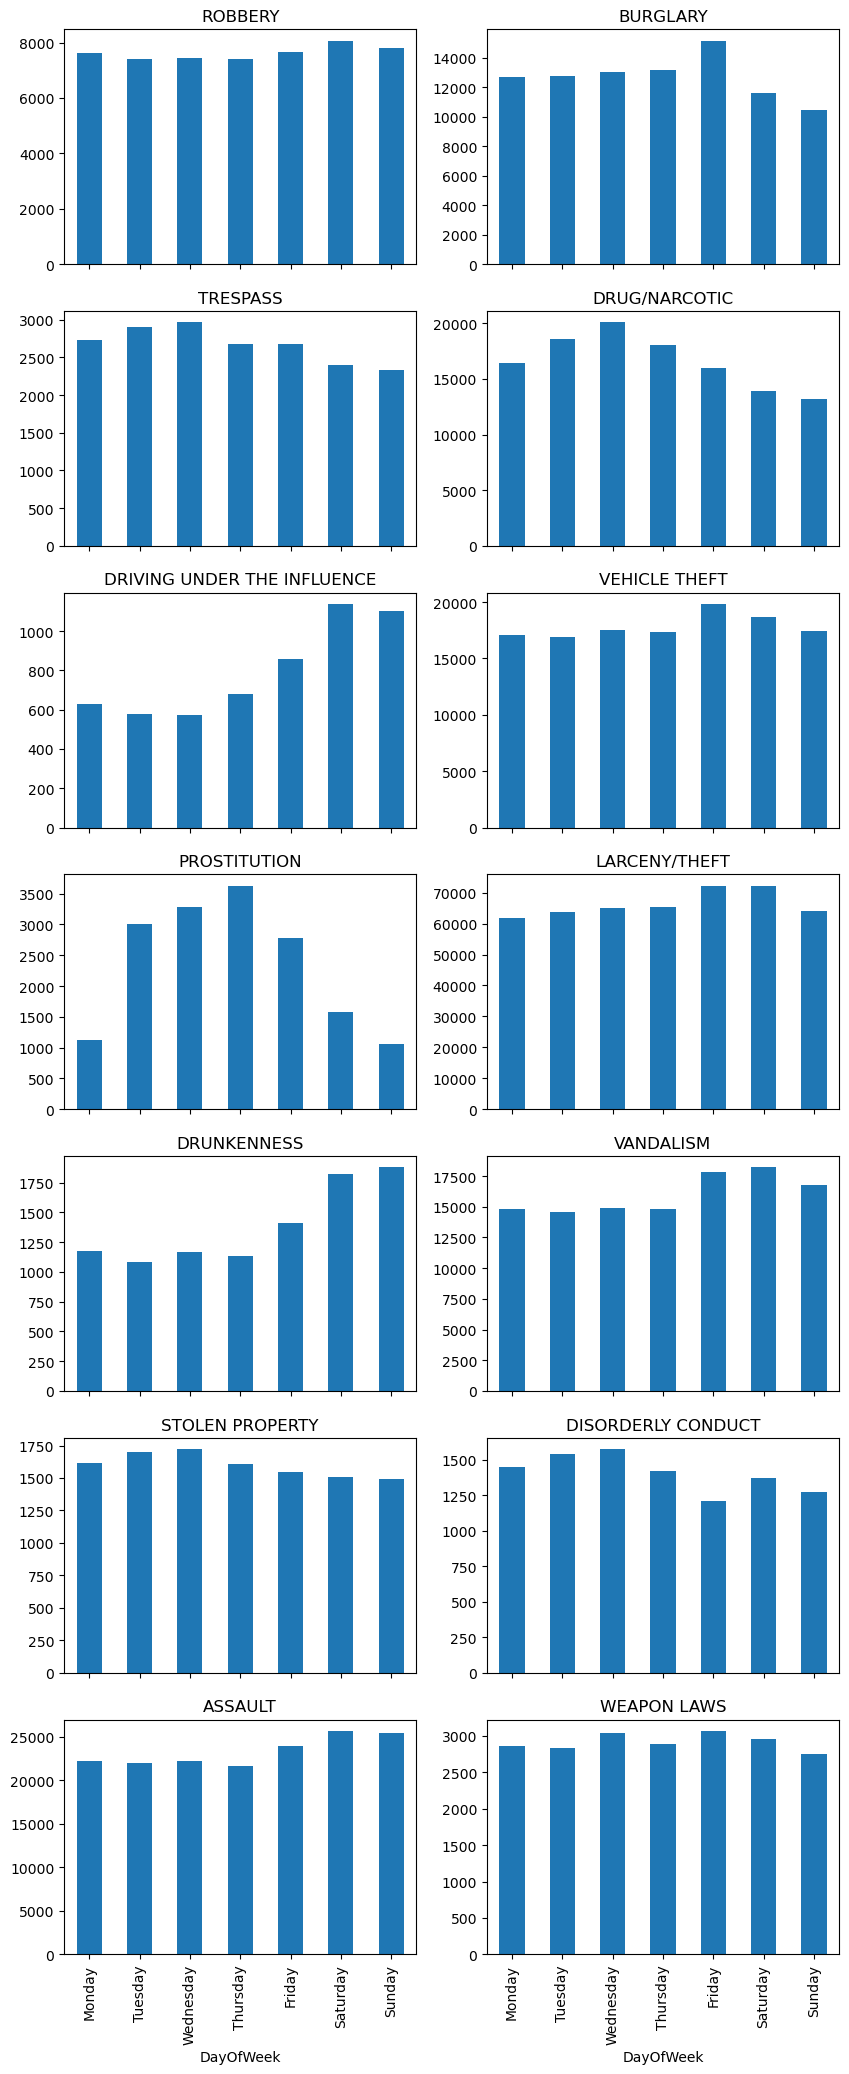

In [74]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
for i, (crime, df) in enumerate(categorizedDaily.items()):
    df.plot(kind='bar', ax=axes[i//2, i%2], title=crime, figsize=(10,25), legend=None)

##### Monthly trends in crimes

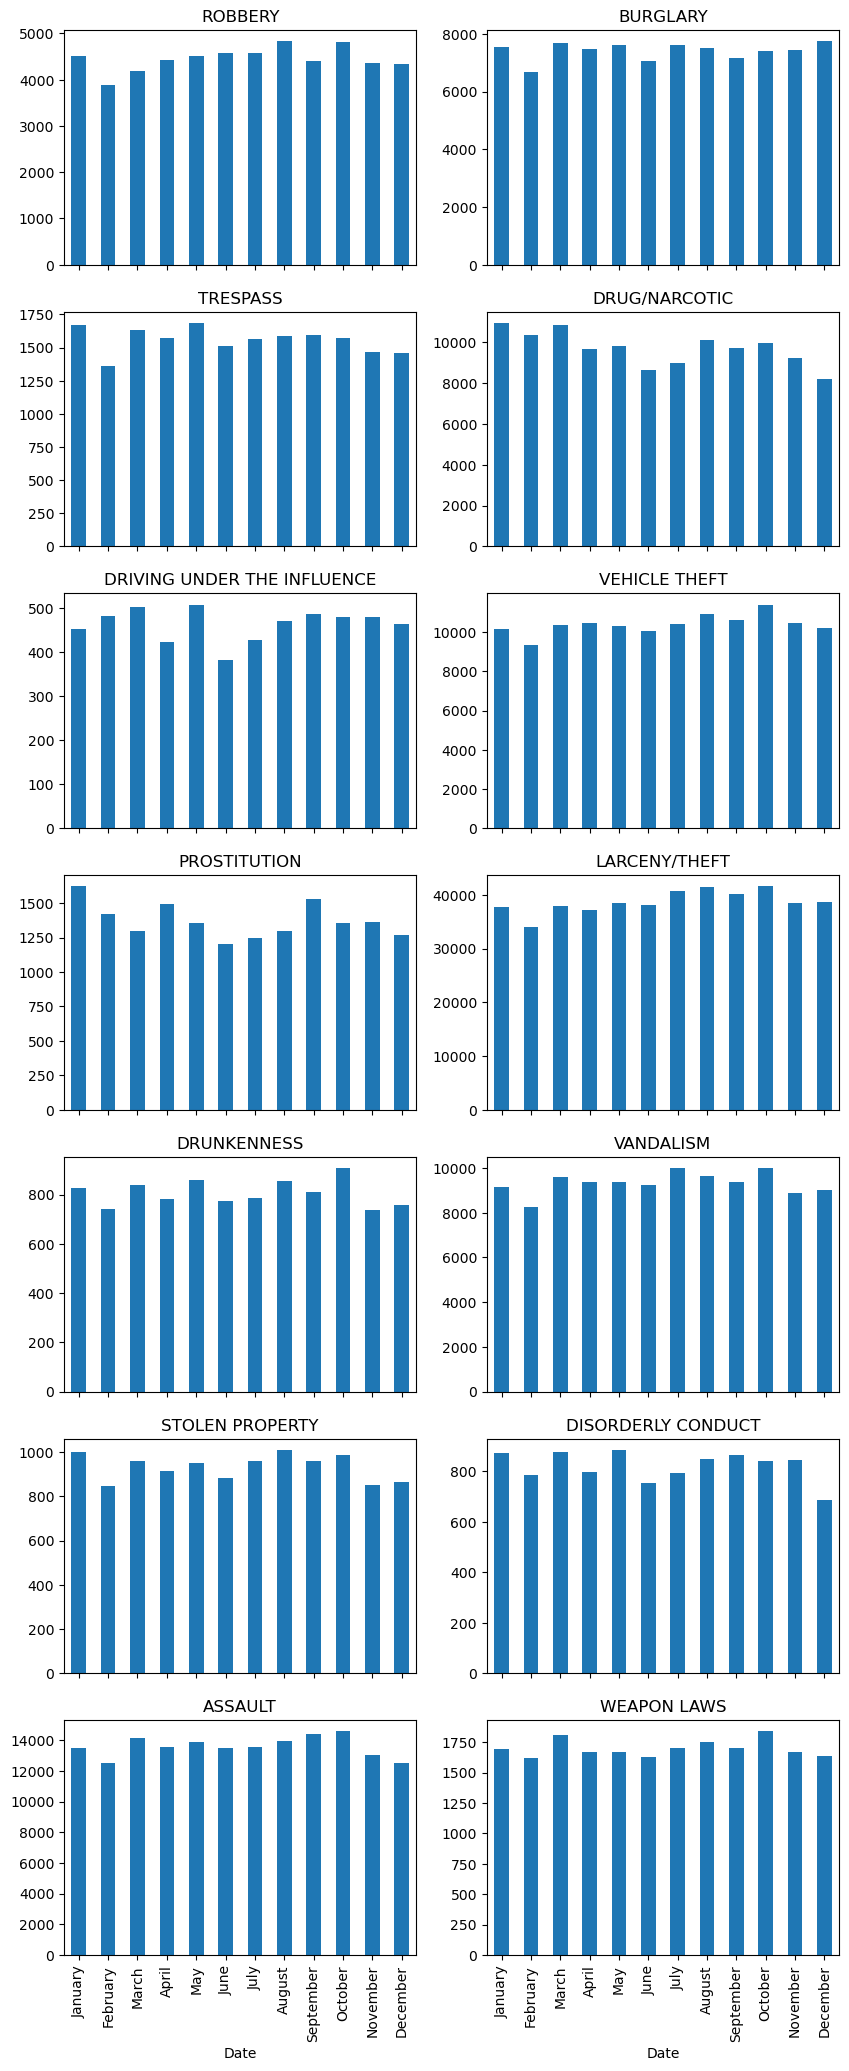

In [75]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
for i, (crime, df) in enumerate(categorizedMonthly.items()):
    df['Count'].plot(kind='bar', ax=axes[i//2, i%2], title=crime, figsize=(10,25), legend=None)

##### Hourly trends in crime

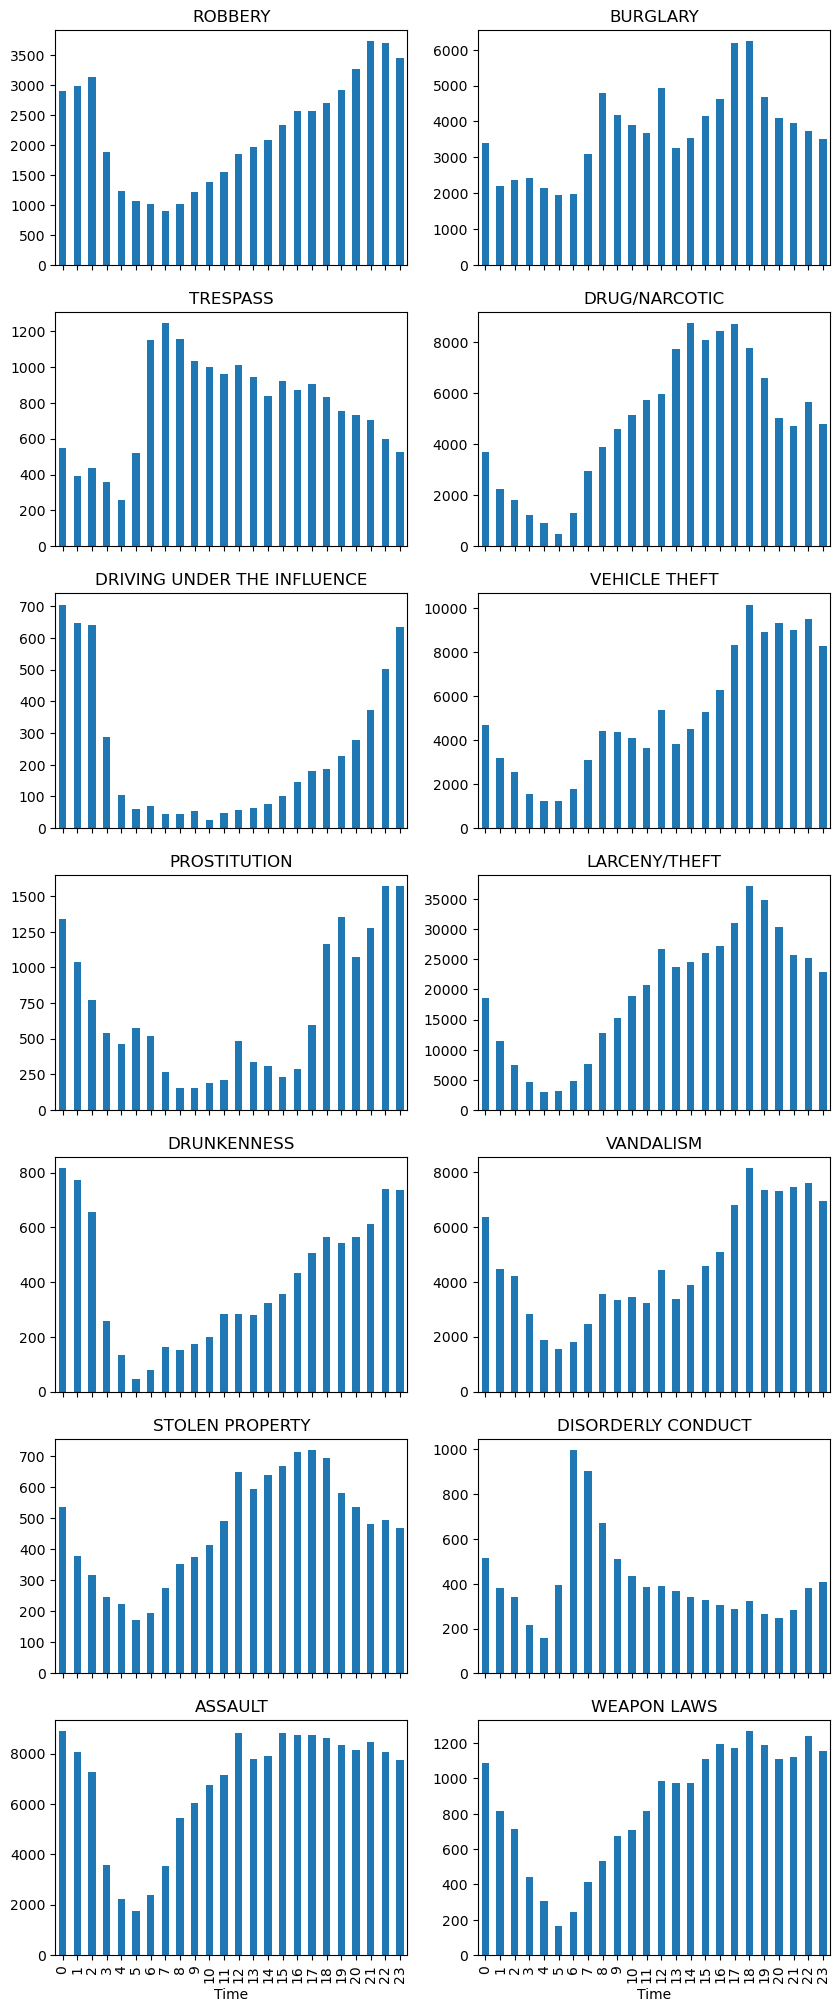

In [76]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
for i, (crime, df) in enumerate(categorizedHourly.items()):
    df['Count'].plot(kind='bar', ax=axes[i//2, i%2], title=crime, figsize=(10,25), legend=None)

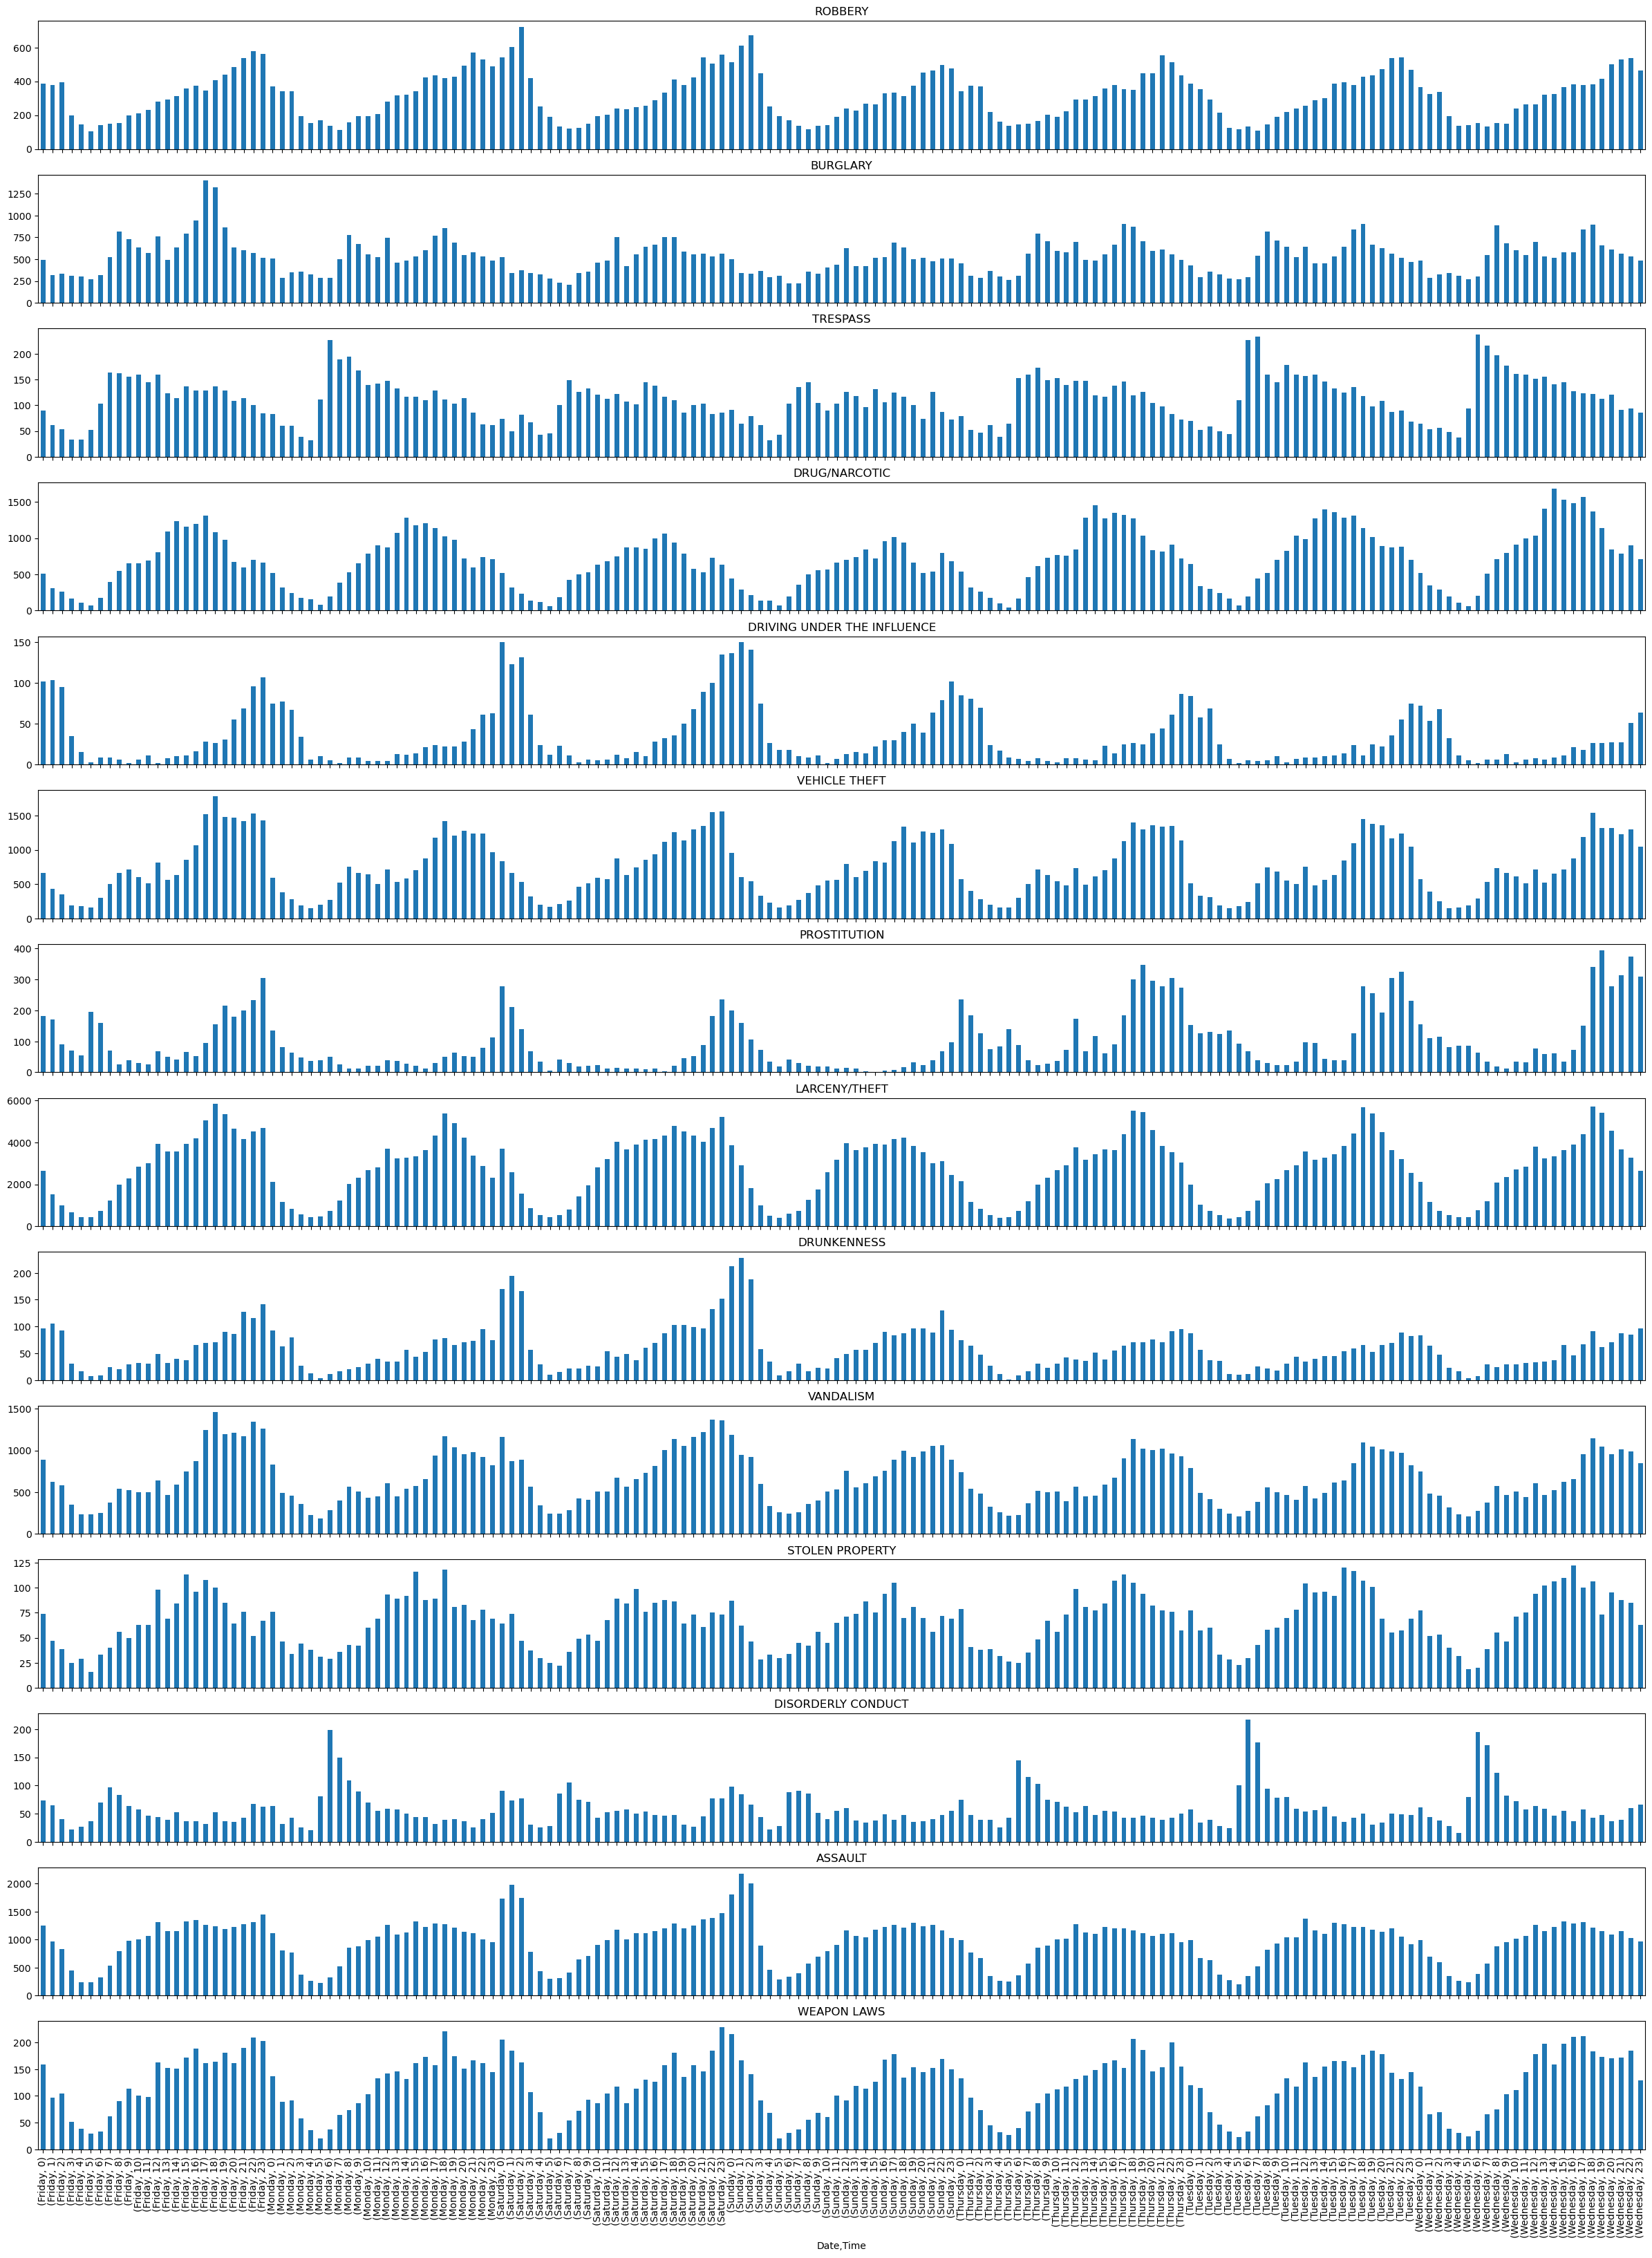

In [77]:
fig, axes = plt.subplots(nrows=14, ncols=1, sharex=True)
for i, (crime, df) in enumerate(categorizedHourlyWithDay.items()):
    df['Count'].plot(kind='bar', ax=axes[i], title=crime, figsize=(30,40), legend=None)